In [1]:
from utils import *

notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, ".."))
results_dir = os.path.join(parent_dir, "results")

# Simulation

### MSE

In [9]:
sim_results_dir = os.path.join(results_dir, "output_data_simulation_rf")
mse_path = os.path.join(sim_results_dir, "mse.csv")
mse_df = pd.read_csv(mse_path)
means = mse_df.mean(axis=0)
n = mse_df.shape[0]
stderr = mse_df.std(axis=0, ddof=1) / np.sqrt(n)
ci_lower = means - 1.96 * stderr
ci_upper = means + 1.96 * stderr
summary_mse_df = pd.DataFrame({
    'MSE': means,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})
summary_mse_df

,MSE,CI Lower,CI Upper
RF,6.423861,6.282847,6.564875
MaggingRF,6.928595,6.720573,7.136618
L-MMRF,7.897941,7.742059,8.053823
Post-RF,6.734765,6.586568,6.882962
Post-L-MMRF,6.774939,6.627854,6.922025
G-DFS-MMRF,6.765350,6.616440,6.914261
G-MMRF,6.763984,6.614908,6.913059


### Max MSE

In [3]:
sim_results_dir = os.path.join(results_dir, "output_data_simulation_rf")
max_mse_path = os.path.join(sim_results_dir, "max_mse.csv")
max_mse_df = pd.read_csv(max_mse_path)
means = max_mse_df.mean(axis=0)
n = max_mse_df.shape[0]
stderr = max_mse_df.std(axis=0, ddof=1) / np.sqrt(n)
ci_lower = means - 1.96 * stderr
ci_upper = means + 1.96 * stderr
summary_max_mse_df = pd.DataFrame({
    'MSE': means,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})
summary_max_mse_df

,MSE,CI Lower,CI Upper
RF,12.155351,11.861350,12.449352
MaggingRF,10.351562,9.584390,11.118733
L-MMRF,9.728319,9.531767,9.924870
Post-RF,8.622079,8.431083,8.813075
Post-L-MMRF,8.576014,8.378875,8.773154
G-DFS-MMRF,8.571189,8.370149,8.772229
G-MMRF,8.569672,8.368986,8.770358


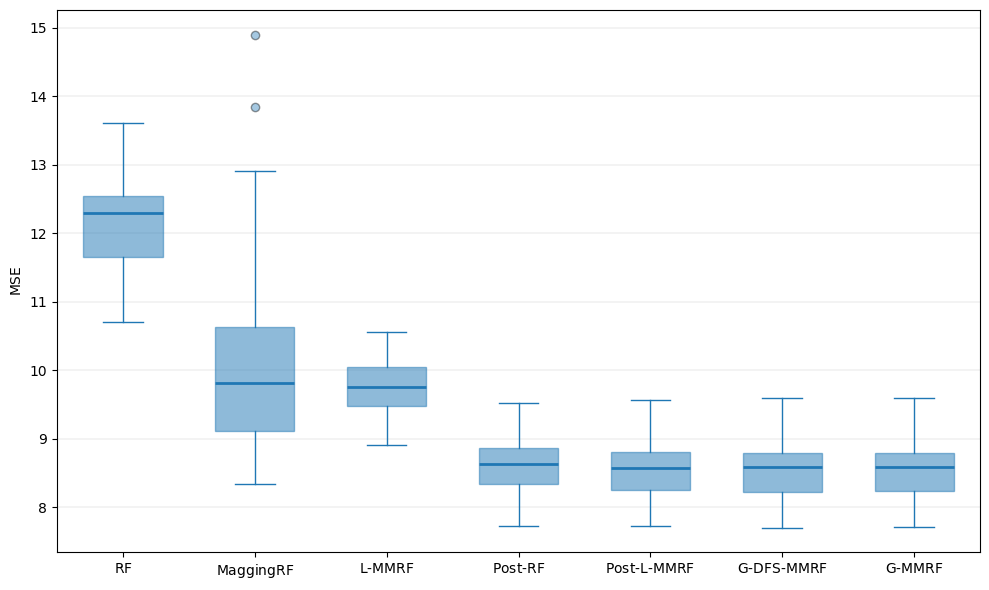

In [4]:
plot_max_mse_boxplot(max_mse_df, saveplot=True, show=True)

### MSE per environment

In [5]:
sim_results_dir = os.path.join(results_dir, "output_data_simulation_rf")
mse_envs_path = os.path.join(sim_results_dir, "mse_envs.csv")
mse_envs_df = pd.read_csv(mse_envs_path)

In [ ]:
# plot_mse_envs(mse_envs_df, saveplot=True)

### Runtime

In [5]:
sim_results_dir = os.path.join(results_dir, "output_data_simulation_rf")
runtime_path = os.path.join(sim_results_dir, "runtime.csv")
runtime_df = pd.read_csv(runtime_path)
means = runtime_df.mean(axis=0)
n = runtime_df.shape[0]
stderr = runtime_df.std(axis=0, ddof=1) / np.sqrt(n)
ci_lower = means - 1.96 * stderr
ci_upper = means + 1.96 * stderr
summary_runtime_df = pd.DataFrame({
    'Runtime': means,
    'CI Lower': ci_lower,
    'CI Upper': ci_upper
})
summary_runtime_df

,Runtime,CI Lower,CI Upper
RF,0.185798,0.165630,0.205965
MaggingRF,0.299148,0.286789,0.311507
L-MMRF,88.515596,87.479243,89.551948
Post-RF,5.838099,5.731688,5.944510
Post-L-MMRF,93.297051,92.202585,94.391517
G-DFS-MMRF,315.536906,311.297754,319.776058
G-MMRF,951.556967,935.670635,967.443298


### min_samples_leaf effect

In [8]:
sim_results_dir = os.path.join(results_dir, "output_data_simulation_rf")
max_mse_msl_path = os.path.join(sim_results_dir, "max_mse_msl.csv")
max_mse_msl_df = pd.read_csv(max_mse_msl_path)

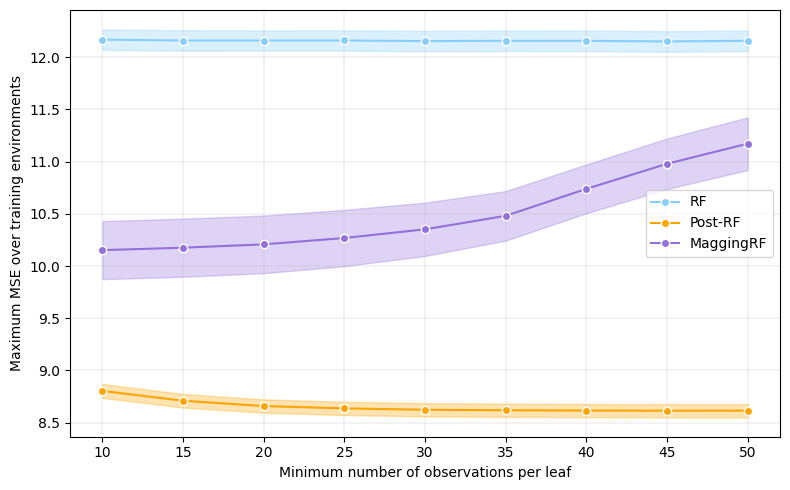

In [9]:
plot_max_mse_msl(max_mse_msl_df, saveplot=True, show=True)

# California Housing Dataset

### Train - Validation - Test

In [2]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_unbalanced.csv")
main_metrics_df = pd.read_csv(main_metrics_path)
# main_metrics_df

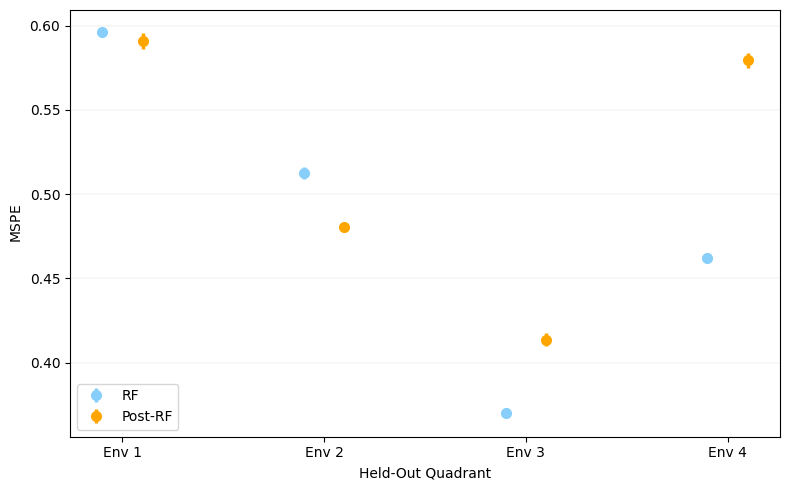

In [12]:
plot_max_score_housing(main_metrics_df, saveplot=True, nameplot="mse_heldout_2_unbalanced", setting=2, show=True)

In [7]:
env_specific_metrics_path = os.path.join(analysis_results_dir, "env_specific_mse_2_unbalanced.csv")
env_specific_metrics_df = pd.read_csv(env_specific_metrics_path)
# env_specific_metrics_df

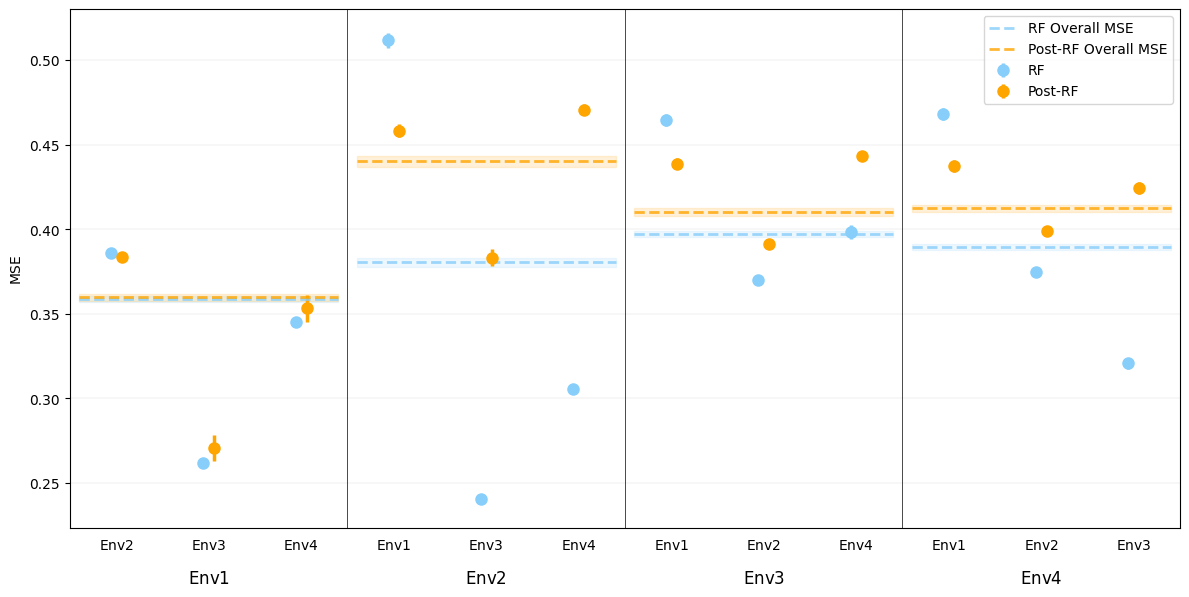

In [8]:
plot_score_envs_housing(env_specific_metrics_df, main_metrics_df, saveplot=True, nameplot="env_specific_mse_2_unbalanced", setting=2, show=True)

In [2]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_unbalanced.csv")
mse_df = pd.read_csv(main_metrics_path)

main_metrics_path = os.path.join(analysis_results_dir, "max_regret_2_unbalanced.csv")
regret_df = pd.read_csv(main_metrics_path)

mse_df["Model"] = mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
regret_df["Model"] = regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
regret_df = regret_df[regret_df["Model"] != "RF"]

df_combined = pd.concat([mse_df, regret_df], ignore_index=True)

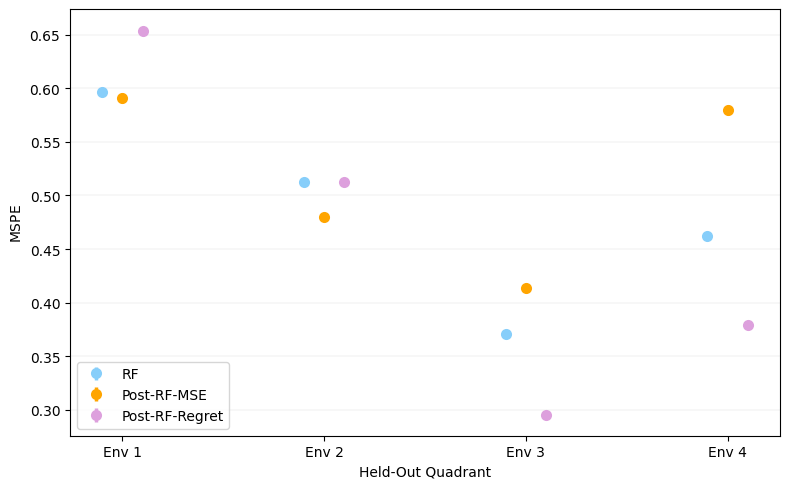

In [4]:
plot_max_score_housing(df_combined, metric="Test_MSE", saveplot=True, nameplot="both_heldout_2_unbalanced", setting=2, show=True)

In [2]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_unbalanced.csv")
mse_df = pd.read_csv(main_metrics_path)
main_metrics_path = os.path.join(analysis_results_dir, "max_regret_2_unbalanced.csv")
regret_df = pd.read_csv(main_metrics_path)
env_specific_metrics_path = os.path.join(analysis_results_dir, "env_specific_mse_2_unbalanced.csv")
env_specific_mse_df = pd.read_csv(env_specific_metrics_path)
env_specific_metrics_path = os.path.join(analysis_results_dir, "env_specific_regret_2_unbalanced.csv")
env_specific_regret_df = pd.read_csv(env_specific_metrics_path)

mse_df["Model"] = mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
regret_df["Model"] = regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
regret_df = regret_df[regret_df["Model"] != "RF"]
df_combined = pd.concat([mse_df, regret_df], ignore_index=True)

env_specific_mse_df["Model"] = env_specific_mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
env_specific_regret_df["Model"] = env_specific_regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
env_specific_regret_df = env_specific_regret_df[env_specific_regret_df["Model"] != "RF"]
env_specific_df_combined = pd.concat([env_specific_mse_df, env_specific_regret_df], ignore_index=True)

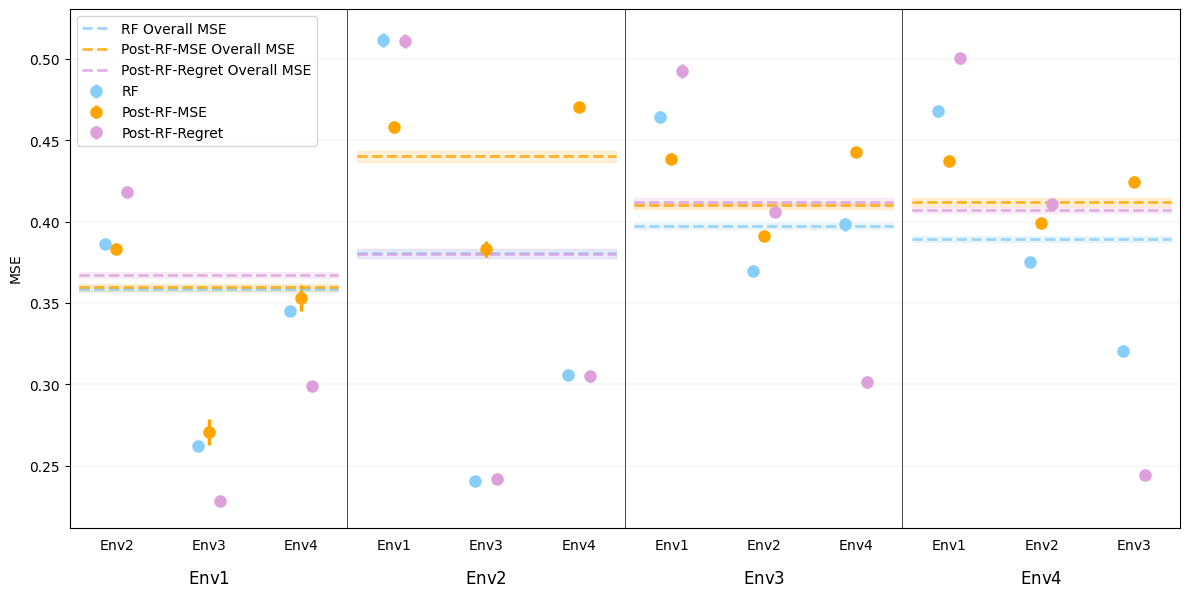

In [4]:
plot_score_envs_housing(env_specific_df_combined, df_combined, setting=2, saveplot=True, nameplot="both_env_specific_mse_2_unbalanced", show=True)

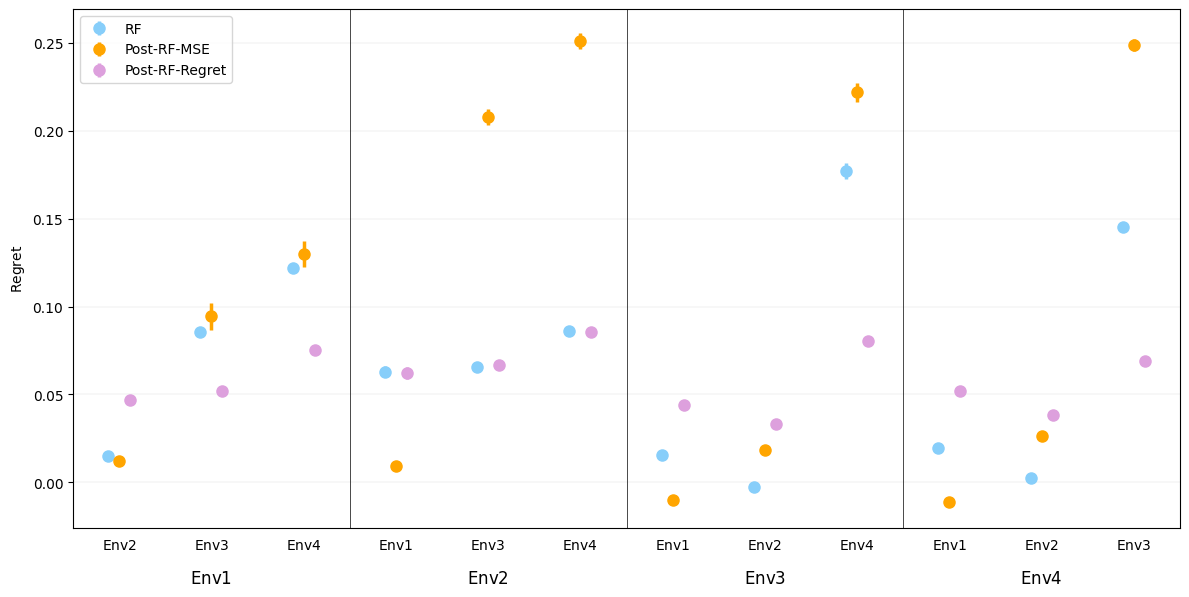

In [5]:
plot_score_envs_housing(env_specific_df_combined, df_combined, setting=2, saveplot=True, nameplot="both_env_specific_regret_2_unbalanced", score="regret", show=True)

In [13]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_balanced.csv")
mse_df = pd.read_csv(main_metrics_path)

main_metrics_path = os.path.join(analysis_results_dir, "max_regret_2_balanced.csv")
regret_df = pd.read_csv(main_metrics_path)

mse_df["Model"] = mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
regret_df["Model"] = regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
regret_df = regret_df[regret_df["Model"] != "RF"]

df_combined = pd.concat([mse_df, regret_df], ignore_index=True)

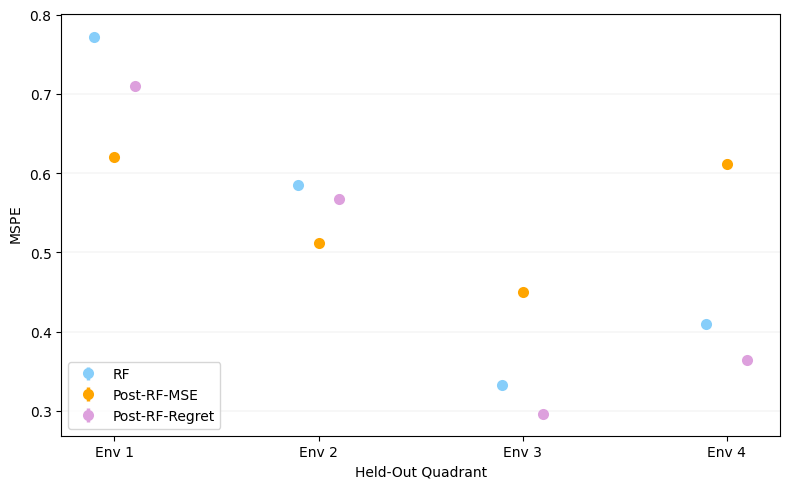

In [14]:
plot_max_score_housing(df_combined, metric="Test_MSE", saveplot=True, nameplot="both_heldout_2_balanced", setting=2, show=True)

### Train - Resample

In [2]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
resample_path = os.path.join(analysis_results_dir, "env_specific_mse_resample.csv")
resample_df = pd.read_csv(resample_path)

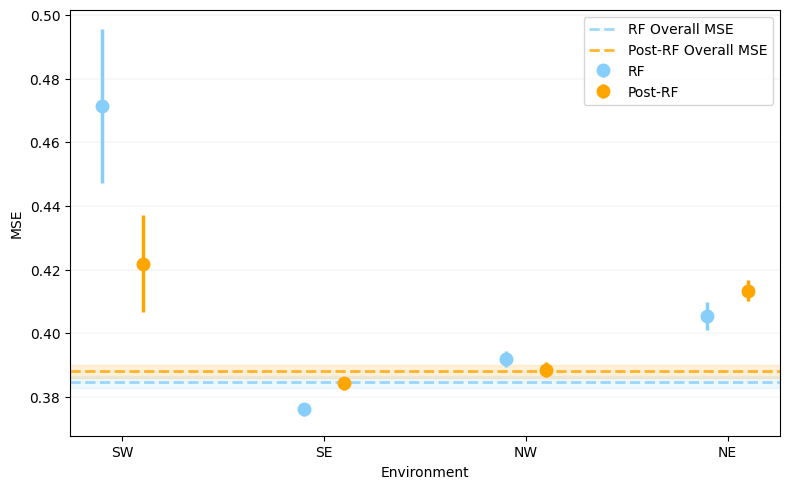

In [3]:
plot_mse_envs_housing_resample(resample_df, saveplot=True)

### Train - mtry

In [4]:
# analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
# mtry_path = os.path.join(analysis_results_dir, "maxmse_mtry.csv")
# mtry_df = pd.read_csv(mtry_path)
# plot_max_mse_mtry(mtry_df, saveplot=True)

In [6]:
mtry_path = os.path.join(analysis_results_dir, "maxmse_mtry_resample.csv")
mtry_df = pd.read_csv(mtry_path)

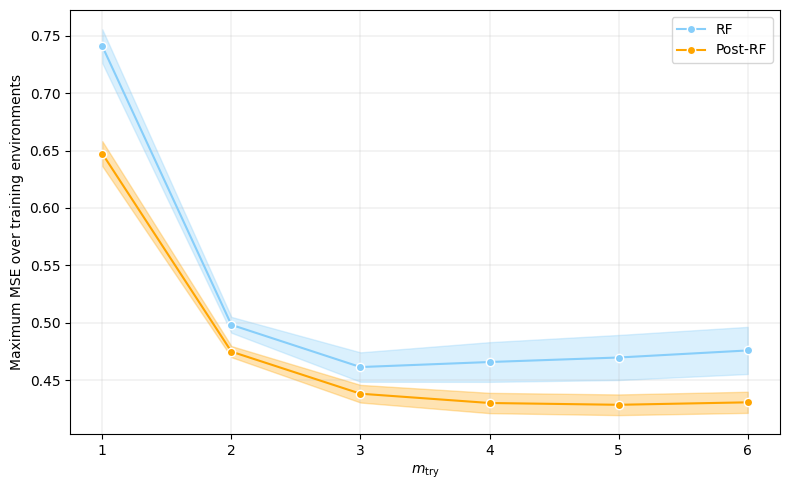

In [7]:
plot_max_mse_mtry_resample(mtry_df, saveplot=True, show=True)

### Plot

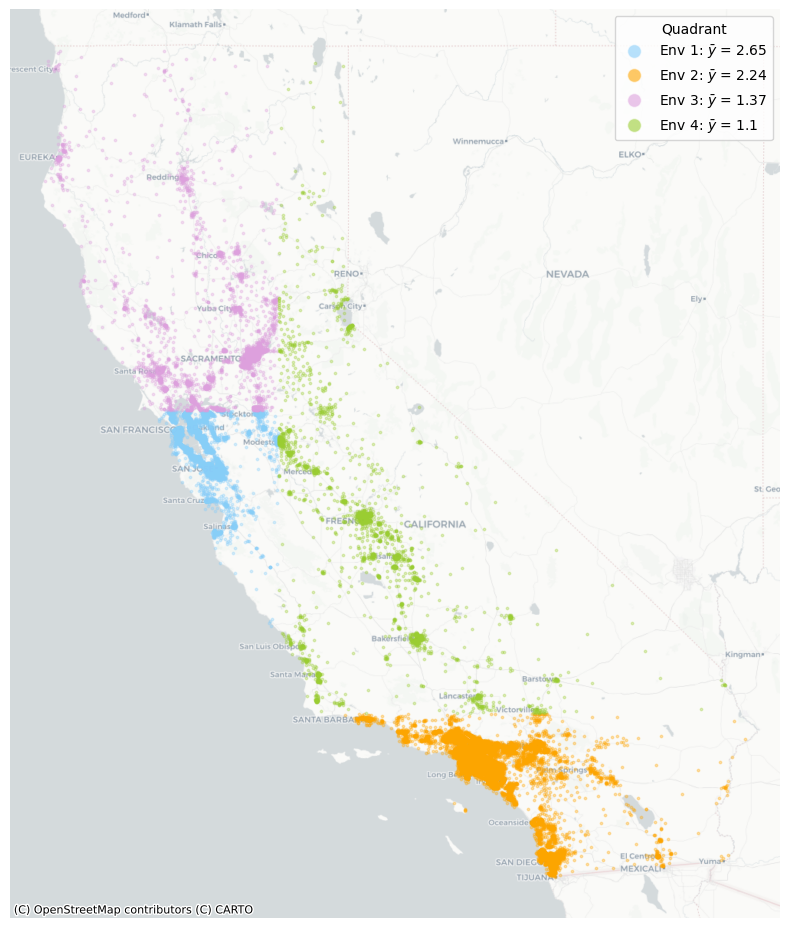

In [2]:
plot_quadrants_with_basemap()

### Test with penalization

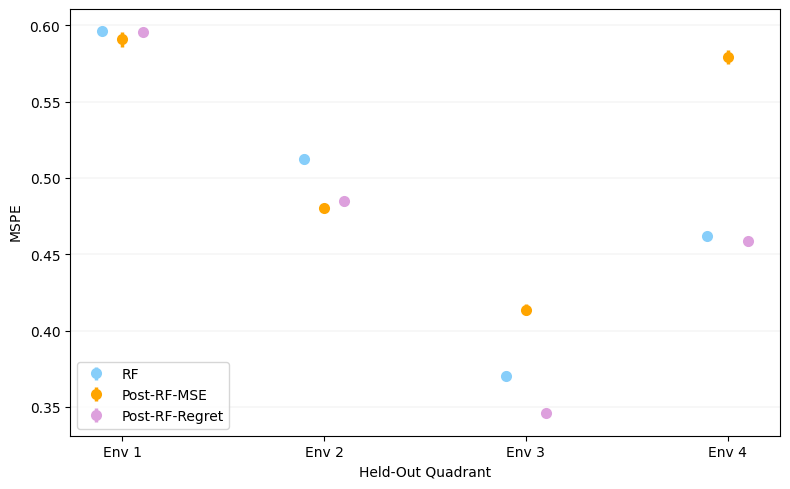

In [16]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_unbalanced.csv")
mse_df = pd.read_csv(main_metrics_path)

main_metrics_path = os.path.join(analysis_results_dir, "max_mixed_2_unbalanced.csv")
regret_df = pd.read_csv(main_metrics_path)

mse_df["Model"] = mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
regret_df["Model"] = regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
regret_df = regret_df[regret_df["Model"] != "RF"]

df_combined = pd.concat([mse_df, regret_df], ignore_index=True)

plot_max_score_housing(df_combined, metric="Test_MSE", setting=2, show=True)

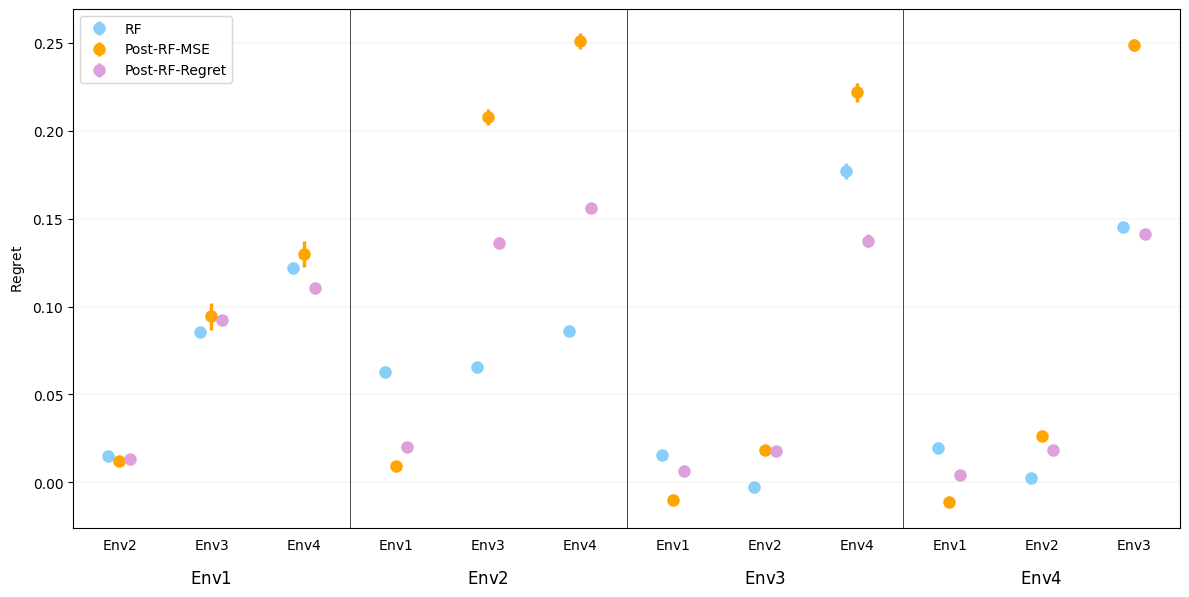

In [17]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_unbalanced.csv")
mse_df = pd.read_csv(main_metrics_path)
main_metrics_path = os.path.join(analysis_results_dir, "max_mixed_2_unbalanced.csv")
regret_df = pd.read_csv(main_metrics_path)
env_specific_metrics_path = os.path.join(analysis_results_dir, "env_specific_mse_2_unbalanced.csv")
env_specific_mse_df = pd.read_csv(env_specific_metrics_path)
env_specific_metrics_path = os.path.join(analysis_results_dir, "env_specific_mixed_2_unbalanced.csv")
env_specific_regret_df = pd.read_csv(env_specific_metrics_path)

mse_df["Model"] = mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
regret_df["Model"] = regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
regret_df = regret_df[regret_df["Model"] != "RF"]
df_combined = pd.concat([mse_df, regret_df], ignore_index=True)

env_specific_mse_df["Model"] = env_specific_mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
env_specific_regret_df["Model"] = env_specific_regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
env_specific_regret_df = env_specific_regret_df[env_specific_regret_df["Model"] != "RF"]
env_specific_df_combined = pd.concat([env_specific_mse_df, env_specific_regret_df], ignore_index=True)

plot_score_envs_housing(env_specific_df_combined, df_combined, setting=2, score="regret", show=True)

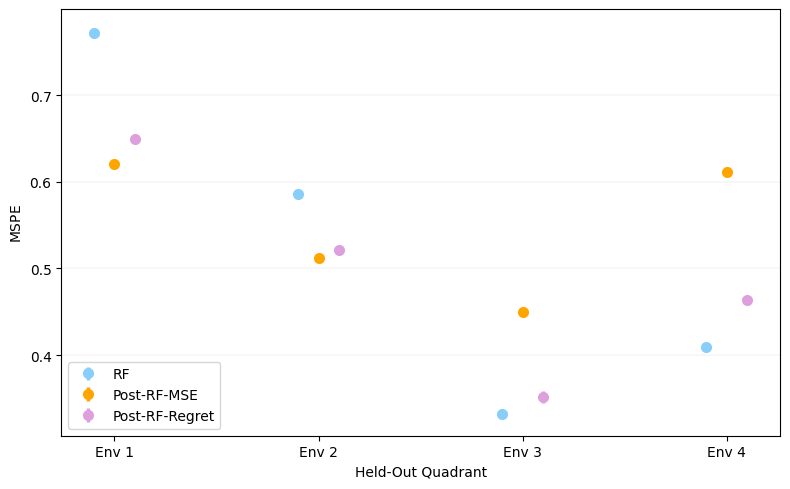

In [15]:
analysis_results_dir = os.path.join(results_dir, "output_data_housing_rf")
main_metrics_path = os.path.join(analysis_results_dir, "max_mse_2_balanced.csv")
mse_df = pd.read_csv(main_metrics_path)

main_metrics_path = os.path.join(analysis_results_dir, "max_mixed_2_balanced.csv")
regret_df = pd.read_csv(main_metrics_path)

mse_df["Model"] = mse_df["Model"].replace({"Post-RF": "Post-RF-MSE"})
regret_df["Model"] = regret_df["Model"].replace({"Post-RF": "Post-RF-Regret"})
regret_df = regret_df[regret_df["Model"] != "RF"]

df_combined = pd.concat([mse_df, regret_df], ignore_index=True)

plot_max_score_housing(df_combined, metric="Test_MSE", setting=2, show=True)